<a href="https://colab.research.google.com/github/RSeth-Creator/Data/blob/dataScience/DL_Swedish_Auto_Insurance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from google.colab import drive
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data_path="/content/gdrive/MyDrive/Semester_III/DeepLearning/AutoInsurSweden.txt"

In [7]:
data = pd.read_csv(data_path,sep='\t')

In [8]:
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


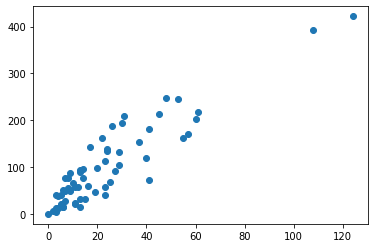

In [14]:
plt.scatter(data['X'],data['Y'])
plt.show()

In [15]:
#Statistical Symmary
description = data.describe()
print(description)

                X           Y
count   63.000000   63.000000
mean    22.904762   98.187302
std     23.351946   87.327553
min      0.000000    0.000000
25%      7.500000   38.850000
50%     14.000000   73.400000
75%     29.000000  140.000000
max    124.000000  422.200000


In [16]:
# Pairwise Pearson correlations
correlations = data.corr(method='pearson')
print(correlations)

          X         Y
X  1.000000  0.912878
Y  0.912878  1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f702b20a510>,
      dtype=object)

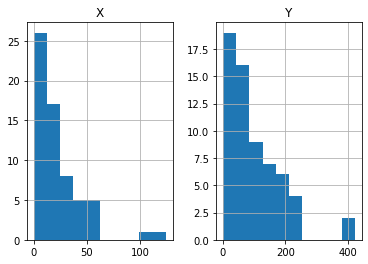

In [17]:
#Data Distribution
data.hist()


In [24]:
x = data[['X']]
y = data['Y']

In [27]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.10,random_state =2)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

model = Sequential() #Create your base model
model.add(Dense(8,activation='relu')) #Add layer with 8 nodes
#model.add(Dropout(0.5))# Add 50% Dropout
model.add(Dense(3,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

import tensorflow as tf

with tf.device('/gpu:0'):
  history=model.fit(x=x_train,y=y_train.values,
            validation_data=(x_test,y_test.values),
            batch_size=128,epochs=10000, callbacks=[early_stop])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 53ms/step - loss: 3781.1306 - val_loss: 7210.1904
Epoch 1118/10000
1/1 [==============================] - 0s 31ms/step - loss: 3780.1167 - val_loss: 7207.0552
Epoch 1119/10000
1/1 [==============================] - 0s 42ms/step - loss: 3779.1013 - val_loss: 7203.9204
Epoch 1120/10000
1/1 [==============================] - 0s 38ms/step - loss: 3778.0859 - val_loss: 7200.7861
Epoch 1121/10000
1/1 [==============================] - 0s 49ms/step - loss: 3777.0698 - val_loss: 7197.6484
Epoch 1122/10000
1/1 [==============================] - 0s 42ms/step - loss: 3776.0530 - val_loss: 7194.5117
Epoch 1123/10000
1/1 [==============================] - 0s 42ms/step - loss: 3775.0369 - val_loss: 7191.3745
Epoch 1124/10000
1/1 [==============================] - 0s 42ms/step - loss: 3774.0190 - val_loss: 7188.2339
Epoch 1125/10000
1/1 [==============================] - 0s 35ms/step - loss: 3773.0007 - val_l

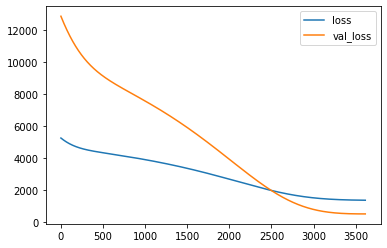

In [33]:
#Plotting the losses
losses = pd.DataFrame(model.history.history)
losses.plot()

In [34]:
#MSE & RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(x_test)
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))


18.7253235408238
22.271691263013967
